In [1]:
! pip install kaggle


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import kaggle

In [3]:
#Downloaded dataset from kaggle by fetching api

!kaggle datasets download -d imakash3011/customer-personality-analysis

Dataset URL: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
License(s): CC0-1.0
customer-personality-analysis.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
#unzipping the downloaded dataset

import zipfile
zip_ref= zipfile.ZipFile('customer-personality-analysis.zip')
zip_ref.extractall()
zip_ref.close()

In [5]:
#importing python library
import pandas as pd

#reading the dataset
df = pd.read_csv('/Users/satarupabanik/Documents/Elevate_Labs_Intern/marketing_campaign.csv', sep='\t')



In [6]:
#Fetching top 5 rows to preview the dataset
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [7]:
#to check column names
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [8]:
# Converting all column names to lowercase
df.columns= df.columns.str.lower()

In [34]:
# Renaming columns to improve readability
df.rename(columns={
    'kidhome': 'kid_at_home',
    'dt_customer': 'customer_enrollment_date',
    'teenhome': 'teen_at_home',
    'mntwines': 'mnt_wines',
    'mntfruits': 'mnt_fruits',
    'mntmeatproducts': 'mnt_meat_products',
    'mntfishproducts': 'mnt_fish_products',
    'mntsweetproducts': 'mnt_sweet_products',
    'mntgoldprods': 'mnt_gold_products',
    'numdealspurchases': 'num_deals_purchases',
    'numwebpurchases': 'num_web_purchases',
    'numcatalogpurchases': 'num_catalog_purchases',
    'numstorepurchases': 'num_store_purchases',
    'numwebvisitsmonth': 'num_web_visits_month',
    'acceptedcmp3': 'accepted_cmp_3',
    'acceptedcmp4': 'accepted_cmp_4',
    'acceptedcmp5': 'accepted_cmp_5',
    'acceptedcmp1': 'accepted_cmp_1',
    'acceptedcmp2': 'accepted_cmp_2',
    'z_costcontact': 'z_cost_contact'
}, inplace=True)



In [35]:
#to check datatypes of the dataset
df.dtypes

id                                   int64
year_birth                           int64
education                           object
marital_status                      object
income                             float64
kid_at_home                          int64
teen_at_home                         int64
customer_enrollment_date    datetime64[ns]
recency                              int64
mnt_wines                          float64
mnt_fruits                         float64
mnt_meat_products                  float64
mnt_fish_products                  float64
mnt_sweet_products                 float64
mnt_gold_products                  float64
num_deals_purchases                  int64
num_web_purchases                    int64
num_catalog_purchases                int64
num_store_purchases                  int64
num_web_visits_month                 int64
accepted_cmp_3                       int64
accepted_cmp_4                       int64
accepted_cmp_5                       int64
accepted_cm

In [11]:
# Converting date column to datetime format
df['customer_enrollment_date']= pd.to_datetime(df['customer_enrollment_date'],format= "%d-%m-%Y")

# Converting selected integer type data columns to float for consistency in numerical operations

df['z_revenue']=df['z_revenue'].astype(float)
df['mnt_wines']=df['mnt_wines'].astype(float)
df['mnt_fruits']= df['mnt_fruits'].astype(float)
df['mnt_meat_products']=df['mnt_meat_products'].astype(float)
df['mnt_fish_products']=df['mnt_fish_products'].astype(float)
df['mnt_sweet_products']=df['mnt_sweet_products'].astype(float)
df['mnt_gold_products']=df['mnt_gold_products'].astype(float)

In [36]:
#to check if data-types are correctly converted
df.dtypes

id                                   int64
year_birth                           int64
education                           object
marital_status                      object
income                             float64
kid_at_home                          int64
teen_at_home                         int64
customer_enrollment_date    datetime64[ns]
recency                              int64
mnt_wines                          float64
mnt_fruits                         float64
mnt_meat_products                  float64
mnt_fish_products                  float64
mnt_sweet_products                 float64
mnt_gold_products                  float64
num_deals_purchases                  int64
num_web_purchases                    int64
num_catalog_purchases                int64
num_store_purchases                  int64
num_web_visits_month                 int64
accepted_cmp_3                       int64
accepted_cmp_4                       int64
accepted_cmp_5                       int64
accepted_cm

In [37]:
# Gives concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        2216 non-null   int64         
 1   year_birth                2216 non-null   int64         
 2   education                 2216 non-null   object        
 3   marital_status            2216 non-null   object        
 4   income                    2216 non-null   float64       
 5   kid_at_home               2216 non-null   int64         
 6   teen_at_home              2216 non-null   int64         
 7   customer_enrollment_date  2216 non-null   datetime64[ns]
 8   recency                   2216 non-null   int64         
 9   mnt_wines                 2216 non-null   float64       
 10  mnt_fruits                2216 non-null   float64       
 11  mnt_meat_products         2216 non-null   float64       
 12  mnt_fish_products        

In [38]:
# Returns a tuple (rows, columns)
df.shape


(2216, 29)

In [15]:
#to check null values in the dataset
df.isnull().sum()

id                           0
year_birth                   0
education                    0
marital_status               0
income                      24
kid_at_home                  0
teen_at_home                 0
customer_enrollment_date     0
recency                      0
mnt_wines                    0
mnt_fruits                   0
mnt_meat_products            0
mnt_fish_products            0
mnt_sweet_products           0
mnt_gold_products            0
num_deals_purchases          0
num_web_purchases            0
num_catalog_purchases        0
num_store_purchases          0
num_web_visits_month         0
accepted_cmp_3               0
accepted_cmp_4               0
accepted_cmp_5               0
accepted_cmp_1               0
accepted_cmp_2               0
complain                     0
z_cost_contact               0
z_revenue                    0
response                     0
dtype: int64

## 24 columns are missing from income and giving null values.Since this is a personality-based analysis, income plays a key role in understanding customer behavior and preferences. And because only a small number of rows have missing income data (around 1%), it makes more sense to drop them instead of trying to fill them in.This way, the overall quality and reliability of the analysis stay intact.

In [17]:
#dropping null values

df = df.dropna(subset=['income'])

In [18]:
#rechecking the null values

df.isnull().sum()

id                          0
year_birth                  0
education                   0
marital_status              0
income                      0
kid_at_home                 0
teen_at_home                0
customer_enrollment_date    0
recency                     0
mnt_wines                   0
mnt_fruits                  0
mnt_meat_products           0
mnt_fish_products           0
mnt_sweet_products          0
mnt_gold_products           0
num_deals_purchases         0
num_web_purchases           0
num_catalog_purchases       0
num_store_purchases         0
num_web_visits_month        0
accepted_cmp_3              0
accepted_cmp_4              0
accepted_cmp_5              0
accepted_cmp_1              0
accepted_cmp_2              0
complain                    0
z_cost_contact              0
z_revenue                   0
response                    0
dtype: int64

In [19]:
#checking for duplicates in the dataset

df.duplicated().sum()

np.int64(0)

In [20]:
#no duplicates value found

#to check statistical summary

df.describe()

,id,year_birth,income,kid_at_home,teen_at_home,customer_enrollment_date,recency,mnt_wines,mnt_fruits,mnt_meat_products,...,num_web_visits_month,accepted_cmp_3,accepted_cmp_4,accepted_cmp_5,accepted_cmp_1,accepted_cmp_2,complain,z_cost_contact,z_revenue,response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,2013-07-10 11:29:27.509025280,49.012635,305.091606,26.356047,166.995939,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,2.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,174.500000,8.000000,68.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.000000,33.000000,232.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,NaN,28.948352,337.327920,39.793917,224.283273,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417


<Axes: >

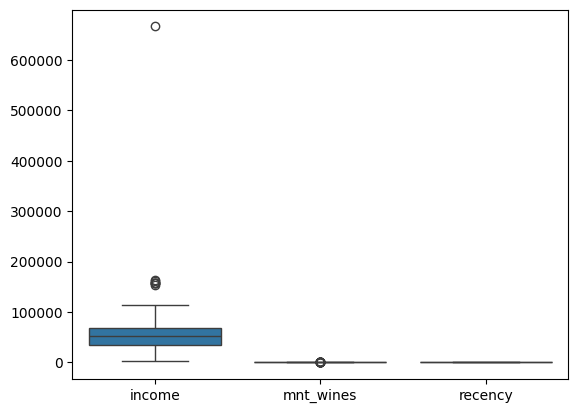

In [21]:
#for checking outliers
import seaborn as sns
sns.boxplot(data=df[['income', 'mnt_wines', 'recency']])


In [22]:
#to check no negative values
(df['income'] < 0).sum()
(df['recency'] < 0).sum()


np.int64(0)

In [23]:
#to check no negative values
mnt_cols = df.filter(like='mnt').columns
(df[mnt_cols] < 0).sum()


mnt_wines             0
mnt_fruits            0
mnt_meat_products     0
mnt_fish_products     0
mnt_sweet_products    0
mnt_gold_products     0
dtype: int64

In [40]:
# checking unique values in 'education' column
df['education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [42]:
# checking unique values in 'marital_status' column
df['marital_status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'Yolo'], dtype=object)

## No need to standardize categorical columns, values are already clear and consistent.

In [43]:
df

,id,year_birth,education,marital_status,income,kid_at_home,teen_at_home,customer_enrollment_date,recency,mnt_wines,...,num_web_visits_month,accepted_cmp_3,accepted_cmp_4,accepted_cmp_5,accepted_cmp_1,accepted_cmp_2,complain,z_cost_contact,z_revenue,response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635.0,...,7,0,0,0,0,0,0,3,11.0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11.0,...,5,0,0,0,0,0,0,3,11.0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426.0,...,4,0,0,0,0,0,0,3,11.0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11.0,...,6,0,0,0,0,0,0,3,11.0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173.0,...,5,0,0,0,0,0,0,3,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709.0,...,5,0,0,0,0,0,0,3,11.0,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406.0,...,7,0,0,0,1,0,0,3,11.0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908.0,...,6,0,1,0,0,0,0,3,11.0,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428.0,...,3,0,0,0,0,0,0,3,11.0,0
